 # PLOTTING RESULTS

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 4-class classification

In [17]:
# IMAGINED
p1_ima_4class = [[26.3,4.6],[26.4,3.4],[26.3,2.8]]
p2_ima_4class = [[31,3.6],[30.6,2.9],[29.9,3.8]]
p6_ima_4class = [[24.6,5],[23.7,3.8],[22.2,5.3]]
p7_ima_4class = [[26.9,4.7],[28,5],[26.2,3.9]]

# INNER
p3_inn_4class = [[24.9,3.7],[24.8,4.3],[23.8,3.1]]
p4_inn_4class = [[25.6,4],[28,4.4],[24.9,3.4]]
p5_inn_4class = [[26.1,6.4],[23.7,6.6],[24,5.6]]
p8_inn_4class = [[27.1,4.9],[24.1,4],[25.9,5.3]]
p9_inn_4class = [[26.9,5.5],[27.9,4.9],[27.5,4.4]]

ima_4class = np.array([p1_ima_4class, p2_ima_4class, p6_ima_4class, p7_ima_4class])
inn_4class = np.array([p3_inn_4class,  p4_inn_4class, p5_inn_4class, p8_inn_4class, p9_inn_4class])


def stder(para_nclass):
    std_para_nclass = [np.sqrt(\
    sum(para_nclass[:,j,1]**2 + ( para_nclass[:,j,0] - np.mean(para_nclass[:,j,0]))**2\
                             )/len(para_nclass)) for j in range(3)]
    return std_para_nclass



mean_ima_4class = [np.mean(ima_4class[:,i,0]) for i in range(3)]    
std_ima_4class = stder(ima_4class)

mean_inn_4class = [np.mean(inn_4class[:,i,0]) for i in range(3)]
std_inn_4class = stder(inn_4class)
                            

    
    
    
graph_data = {
    'values':
        {'RF':list(ima_4class[:,0,0])+list(inn_4class[:,0,0]),
        'SVM':list(ima_4class[:,1,0])+list(inn_4class[:,1,0]),
        'KNN':list(ima_4class[:,2,0])+list(inn_4class[:,2,0])},
    'stds':
         {'RF':list(ima_4class[:,0,1])+list(inn_4class[:,0,1]),
        'SVM':list(ima_4class[:,1,1])+list(inn_4class[:,1,1]),
        'KNN':list(ima_4class[:,2,1])+list(inn_4class[:,2,1])}}

inner_participants = ['P3','P4','P5','P8','P9']
imagined_participants = ['P1','P2','P6','P7']
all_participants = ['IMA-P1','IMA-P2','IMA-P6','IMA-P7','INN-P3','INN-P4','INN-P5','INN-P8','INN-P9']

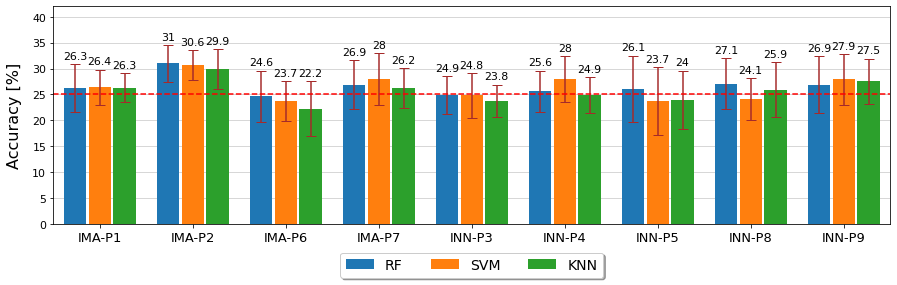

In [18]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True, title = False,\
             title_string = None):
    
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    n_bars = len(data['values'])
    bar_width = total_width / n_bars
    bars = []

    for i, (name, values) in enumerate(data['values'].items()):
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
        for x, y in enumerate(values):
            error = data['stds'][name][x]
            bar = ax.bar(x + x_offset, np.round(y,1), width=bar_width * single_width, \
                         color=colors[i % len(colors)],yerr=error,\
                        align='center', ecolor='brown', capsize=5)
            ax.bar_label(bar, fontsize=11, rotation=0, padding=3)
        bars.append(bar[0])
        
#     ax.set_title('{}'.format(title_string),fontsize = 17,pad=15)
    plt.axhline(y=25, color='red', linestyle='dashed', linewidth=1.5,label= 'Chance level')
    box = ax.get_position()
    ax.legend(bars, data['values'].keys(),loc='upper center', \
              bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5, fontsize=14)
    
def graph_printer(title):
    
    data = graph_data

    fig, ax1 = plt.subplots(figsize=(15,4))


    bar_plot(ax1, data, total_width=.8, single_width=.9,legend=False, \
             title = True, title_string=title)
    
    ax1.set_ylabel('Accuracy [%]',fontsize = 16,labelpad=10)
    ax1.set_axisbelow(True)
    ax1.grid(axis='y',linewidth = 0.5)
    ax1.tick_params(axis = 'y',labelsize=11)
    plt.xticks(range(9),all_participants,fontsize=13)
    plt.yticks(list(i for i in range(0,75,5)))
    plt.ylim(0, 42)
    plt.xlim(-0.5,8.5)
    
    plt.savefig('4class.png', bbox_inches='tight', dpi=300)

graph_printer('')

# 2. 4-class classification by stimulus modality

In [19]:
# IMAGINED
P1_ima_audio = [[25.7,7.4],[23.7,6.3],[28.5,7.5]]
P1_ima_image = [[25.4,6.2],[24,5.8],[27.5,6.6]]
P1_ima_text = [[25.5,7.6],[26.4,7.1],[25.5,5]]

P2_ima_audio = [[38.1,7.3],[33.6,5.2],[33.2,5.6]]
P2_ima_image = [[31.5,7.6],[26,6.1],[29.1,5.6]]
P2_ima_text = [[28.1,8.1],[25.9,6.3],[26.7,6.2]]

P6_ima_audio = [[28.5,8.4],[24.9,8.8],[27.5,7]]
P6_ima_image = [[26.8,9.1],[28.5,8.2],[28.5,7.2]]
P6_ima_text = [[24.1,7.1],[21.1,8.4],[26.3,6.8]]

P7_ima_audio = [[32.7,8.6],[34,5.3],[26,5.5]]
P7_ima_image = [[28.4,8.4],[25.1,6.9],[25,6.4]]
P7_ima_text = [[25,7.6],[26.9,7.6],[24.3,7.9]]

# INNER
P3_inn_audio = [[27.6,7.6],[26.4,7.2],[26,5.3]]
P3_inn_image = [[24.1,7],[29.3,6.7],[24.3,7.8]]
P3_inn_text = [[28.2,7.6],[30.1,5.8],[25.5,6.4]]

P4_inn_audio = [[29.7,7],[31.6,5.6],[26.8,7]]
P4_inn_image = [[26,7.6],[26.9,8.6],[23.7,5.5]]
P4_inn_text = [[22.9,6.6],[25.2,7.1],[23.2,7.2]]

P5_inn_audio = [[29.6,9.1],[31.5,11.6],[26.9,12.4]]
P5_inn_image = [[27.5,10.2],[24.2,9.9],[24.1,9.2]]
P5_inn_text = [[22.3,10],[21.7,8.7],[26.7,9.5]]

P8_inn_audio = [[30.7,10.5],[31.4,11.2],[23.6,8.6]]
P8_inn_image = [[23.4,8.9],[23.3,6.2],[29.4,10.7]]
P8_inn_text = [[23.9,7.1],[26.7,7.1],[23.2,11.3]]

P9_inn_audio = [[27.9,6.9],[34.2,9.2],[27.3,5]]
P9_inn_image = [[27.9,8.2],[28.9,8.6],[24.6,8.6]]
P9_inn_text = [[30.2,9],[26.5,9.2],[22.7,6.4]]

# Collecting data together
ima_audio = np.array([P1_ima_audio, P2_ima_audio, P6_ima_audio, P7_ima_audio])
ima_image = np.array([P1_ima_image, P2_ima_image, P6_ima_image, P7_ima_image])
ima_text = np.array([P1_ima_text, P2_ima_text, P6_ima_text, P7_ima_text])

inn_audio = np.array([P3_inn_audio, P4_inn_audio, P5_inn_audio, P8_inn_audio, P9_inn_audio])
inn_image = np.array([P3_inn_image, P4_inn_image, P5_inn_image, P8_inn_image, P9_inn_image])
inn_text = np.array([P3_inn_text, P4_inn_text, P5_inn_text, P8_inn_text, P9_inn_text])

def stder(para_nclass):
    std_para_nclass = [np.sqrt(\
    sum(para_nclass[:,j,1]**2 + ( para_nclass[:,j,0] - np.mean(para_nclass[:,j,0]))**2\
                             )/len(para_nclass)) for j in range(3)]
    return std_para_nclass


# Calculating averages and standard deviations using pooled estimators
mean_ima_audio = [np.mean(ima_audio[:,i,0]) for i in range(3)]
std_ima_audio = stder(ima_audio)
# std_ima_audio = [np.sqrt(sum(ima_audio[:,j,1]**2)/len(ima_audio)) for j in range(3)]
# data_ima_audio = np.array([[mean_ima_audio[i],std_ima_audio[i]] for i in range(len(mean_ima_audio))])

mean_ima_image = [np.mean(ima_image[:,i,0]) for i in range(3)]
std_ima_image = stder(ima_image)
# std_ima_image = [np.sqrt(sum(ima_image[:,j,1]**2)/len(ima_image)) for j in range(3)]
# data_ima_image = np.array([[mean_ima_image[i],std_ima_image[i]] for i in range(len(mean_ima_image))])

mean_ima_text = [np.mean(ima_text[:,i,0]) for i in range(3)]
std_ima_text = stder(ima_text)
# std_ima_text = [np.sqrt(sum(ima_text[:,j,1]**2)/len(ima_text)) for j in range(3)]
# data_ima_text = np.array([[mean_ima_text[i],std_ima_text[i]] for i in range(len(mean_ima_text))])

mean_inn_audio = [np.mean(inn_audio[:,i,0]) for i in range(3)]
std_inn_audio= stder(inn_audio)
# std_inn_audio = [np.sqrt(sum(inn_audio[:,j,1]**2)/len(inn_audio)) for j in range(3)]
# data_inn_audio = np.array([[mean_inn_audio[i],std_inn_audio[i]] for i in range(len(mean_inn_audio))])

mean_inn_image = [np.mean(inn_image[:,i,0]) for i in range(3)]
std_inn_image = stder(inn_image)
# std_inn_image = [np.sqrt(sum(inn_image[:,j,1]**2)/len(inn_image)) for j in range(3)]
# data_inn_image = np.array([[mean_inn_image[i],std_inn_image[i]] for i in range(len(mean_inn_image))])

mean_inn_text = [np.mean(inn_text[:,i,0]) for i in range(3)]
std_inn_text = stder(inn_text)
# std_inn_text = [np.sqrt(sum(inn_text[:,j,1]**2)/len(inn_text)) for j in range(3)]
# data_inn_text = np.array([[mean_inn_text[i],std_inn_text[i]] for i in range(len(mean_inn_text))])


graph_data2 = {
    'values':
        {'RF':[mean_ima_audio[0], mean_ima_image[0], mean_ima_text[0],\
               mean_inn_audio[0], mean_inn_image[0], mean_inn_text[0]],
        'SVM':[mean_ima_audio[1], mean_ima_image[1], mean_ima_text[1],\
               mean_inn_audio[1], mean_inn_image[1], mean_inn_text[1]],
        'KNN':[mean_ima_audio[2], mean_ima_image[2], mean_ima_text[2],\
               mean_inn_audio[2], mean_inn_image[2], mean_inn_text[2]]},
    'stds':
        {'RF':[std_ima_audio[0], std_ima_image[0], std_ima_text[0],\
               std_inn_audio[0], std_inn_image[0], std_inn_text[0]],
        'SVM':[std_ima_audio[1], std_ima_image[1], std_ima_text[1],\
               std_inn_audio[1], std_inn_image[1], std_inn_text[1]],
        'KNN':[std_ima_audio[2], std_ima_image[2], std_ima_text[2],\
               std_inn_audio[2], std_inn_image[2], std_inn_text[2]]}}

modalities = ['IMA-Audio','IMA-Image','IMA-Text','INN-Audio','INN-Image','INN-Text']


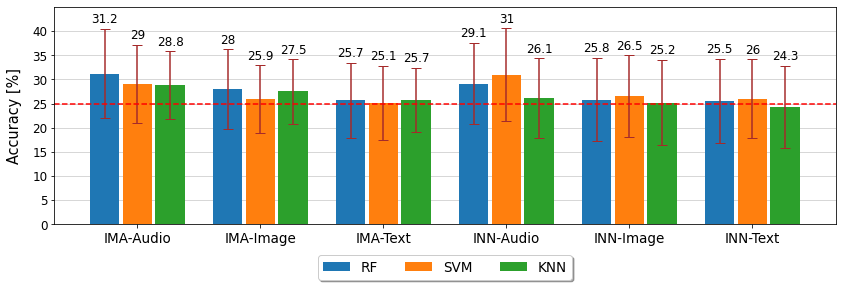

In [20]:
def bar_plot2(ax, data, colors=None, total_width=0.8, single_width=1, legend=True, title = False,\
             title_string = None):
    
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    n_bars = len(data['values'])
    bar_width = total_width / n_bars
    bars = []

    for i, (name, values) in enumerate(data['values'].items()):
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
        for x, y in enumerate(values):
            error = data['stds'][name][x]
            bar = ax.bar(x + x_offset, np.round(y,1), width=bar_width * single_width, \
                         color=colors[i % len(colors)],yerr=error,\
                        align='center', ecolor='brown', capsize=5)
            ax.bar_label(bar, fontsize=12, rotation=0, padding=3)
        bars.append(bar[0])
        
    ax.set_title('{}'.format(title_string),fontsize = 16,pad=15)
    plt.axhline(y=25, color='red', linestyle='dashed', linewidth=1.5,label= 'Chance level')
    box = ax.get_position()
    ax.legend(bars, data['values'].keys(),loc='upper center', \
              bbox_to_anchor=(0.5, -0.11),
              fancybox=True, shadow=True, ncol=5, fontsize=13.5)
    
def graph_printer2(title):
    
    data = graph_data2

    fig, ax1 = plt.subplots(figsize=(14,4))


    plt.yticks([0,5,10,15,20,25,30,35,40])

    bar_plot2(ax1, data, total_width=.8, single_width=.9,legend=False, \
             title = True, title_string=title)
    
    ax1.set_ylabel('Accuracy [%]',fontsize = 14.5,labelpad=10)
    ax1.set_axisbelow(True)
    ax1.grid(axis='y',linewidth = 0.5)
    ax1.tick_params(axis = 'y',labelsize=12)
    plt.xticks(range(6),modalities,fontsize=13.5)
    plt.ylim(0, 45)
    plt.savefig('modes.png', bbox_inches='tight', dpi=300)

graph_printer2('')

# 3. Binary classification by complexity: discerning Long and Short words

In [ ]:
# # IMAGINED
# P1_ima_LS = [] 
# P2_ima_LS = []
# P6_ima_LS = []
# P7_ima_LS = []

# # INNER
# P3_inn_LS = []
# P4_inn_LS = []
# P5_inn_LS = []
# P8_inn_LS = []
# P9_inn_LS = []


# # # Collecting data together
# ima_LS = np.array([P1_ima_LS, P2_ima_LS, P6_ima_LS, P7_ima_LS])
# inn_LS = np.array([P3_inn_LS, P4_inn_LS, P5_inn_LS, P8_inn_LS, P9_inn_LS])


# # # Calculating averages and standard deviations using pooled estimators
# mean_ima_LS = [np.mean(ima_LS[:,i,0]) for i in range(3)]
# std_ima_LS = [np.sqrt(sum(ima_LS[:,j,1]**2)/len(ima_LS)) for j in range(3)]
              
# mean_inn_LS = [np.mean(inn_LS[:,i,0]) for i in range(3)]
# std_inn_LS = [np.sqrt(sum(inn_LS[:,j,1]**2)/len(inn_LS)) for j in range(3)]


# graph_data4 = {
#     'values':
#         {'RF':[mean_ima_LS[0], mean_inn_LS[0]],
#         'SVM':[mean_ima_LS[1], mean_inn_LS[1]],
#         'KNN':[mean_ima_LS[2],mean_inn_LS[2]]},
#     'stds':
#         {'RF':[std_ima_LS[0],std_inn_LS[0]],
#         'SVM':[std_ima_LS[1],std_inn_LS[1]],
#         'KNN':[std_ima_LS[2],std_inn_LS[2]]}
# }

# complexities = ['Imagined','Inner']
# # graph_data4
# # speech_complexities = ['IMA-Short','IMA-Long','INN-Long','INN-Short']

In [ ]:
# def bar_plot3(ax, data, colors=None, total_width=0.8, single_width=1, legend=True, title = False,\
#              title_string = None):
    
#     # Check if colors where provided, otherwhise use the default color cycle
#     if colors is None:
#         colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#     # Number of bars per group
#     n_bars = len(data['values'])
#     # The width of a single bar
#     bar_width = total_width / n_bars
#     # List containing handles for the drawn bars, used for the legend
#     bars = []

#     for i, (name, values) in enumerate(data['values'].items()):
#         x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
#         for x, y in enumerate(values):
#             error = data['stds'][name][x]
#             bar = ax.bar(x + x_offset, np.round(y,1), width=bar_width * single_width, \
#                          color=colors[i % len(colors)],yerr=error,\
#                         align='center', ecolor='brown', capsize=5)
#             ax.bar_label(bar, fontsize=12, rotation=0, padding=3)
#         bars.append(bar[0])
        
#     ax.set_title('{}'.format(title_string),fontsize = 16,pad=15)
#     plt.axhline(y=50, color='red', linestyle='dashed', linewidth=1.5,label= 'Chance level')

#     box = ax.get_position()
#     ax.legend(bars, data['values'].keys(),loc='upper center', \
#               bbox_to_anchor=(0.5, -0.1),
#               fancybox=True, shadow=True, ncol=5, fontsize=13.5)
    
# def graph_printer3(title):
    
#     data = graph_data4

#     fig, ax1 = plt.subplots(figsize=(10,4))


#     plt.yticks(list(i for i in range(0,75,10)))

#     bar_plot3(ax1, data, total_width=.8, single_width=.9,legend=False, \
#              title = True, title_string=title)
    
#     ax1.set_ylabel('Accuracy [%]',fontsize = 14.5,labelpad=10)
#     ax1.set_axisbelow(True)
#     ax1.grid(axis='y',linewidth = 0.5)
#     ax1.tick_params(axis = 'y',labelsize=12)
#     plt.xticks(range(2),complexities,fontsize=13)
#     plt.ylim(0, 70)
#     plt.savefig('longshort.png', bbox_inches='tight', dpi=300)

# graph_printer3('')

# 4. Binary classification by complexity: Ambulance vs Hospital and Clock vs Lamp

In [30]:
# IMAGINED
P1_ima_long = [[51,6.9], [50.5,5.2],[51.1,7.1]]
P1_ima_short = [[51.9,6.2],[52.4,7.1],[52.9,5.9]]

P2_ima_long = [[59.7,5.5],[57.2,6.1],[56.2,5.8]]
P2_ima_short = [[57.4,8.2],[56.4,5.9],[52.8,7.6]]

P6_ima_long = [[48.2,8],[50.1,7.6],[50.4,7.3]]
P6_ima_short = [[48.8,8.6],[52.9,7.7],[48.2,8.3]]

P7_ima_long = [[54.6,8.3],[51.8,8.2],[49.1,6]]
P7_ima_short = [[51.2,7.3],[49.9,6.8], [49,6.8]]

# INNER
P3_inn_long = [[51.1,5.6],[48,6.1],[50.5,5.2]]
P3_inn_short = [[48.7,6.4],[47.9,5.1],[47.5,7.1]]

P4_inn_long = [[51.2,6.8],[50.7,5.5],[48.7,6.9]]
P4_inn_short = [[53.4,5.9],[57.7,5.6],[52.6,5.6]]

P5_inn_long = [[50.3,8.0],[50.4,9.4],[51.1,9.3]]
P5_inn_short = [[51.5,7.9],[46.1,11],[51.2,9.8]]

P8_inn_long = [[50.2,10],[44.4,0.89],[49.4,7.5]]
P8_inn_short = [[54,10],[50.8,7.5],[51,11.4]]

P9_inn_long = [[51.1,7.6],[52.4,8.2],[52,4.9]]
P9_inn_short = [[50.1,7.8],[53.5,8],[50.8,5.8]]



# # Collecting data together
ima_LONG = np.array([P1_ima_long, P2_ima_long, P6_ima_long, P7_ima_long])
ima_SHORT = np.array([P1_ima_short, P2_ima_short, P6_ima_short, P7_ima_short])

inn_LONG = np.array([P3_inn_long, P4_inn_long, P5_inn_long, P8_inn_long, P9_inn_long])
inn_SHORT = np.array([P3_inn_short, P4_inn_short, P5_inn_short, P8_inn_short, P9_inn_short])


# # Calculating averages and standard deviations using pooled estimators
mean_ima_LONG = [np.mean(ima_LONG[:,i,0]) for i in range(3)]
std_ima_LONG = stder(ima_LONG)

mean_ima_SHORT = [np.mean(ima_SHORT[:,i,0]) for i in range(3)]
std_ima_SHORT = stder(ima_SHORT)

mean_inn_LONG = [np.mean(inn_LONG[:,i,0]) for i in range(3)]
std_inn_LONG = stder(inn_LONG)

mean_inn_SHORT = [np.mean(inn_SHORT[:,i,0]) for i in range(3)]
std_inn_SHORT = stder(inn_SHORT)

graph_data4 = {
    'values':
        {'RF':[mean_ima_SHORT[0], mean_ima_LONG[0],mean_inn_SHORT[0], mean_inn_LONG[0]],
        'SVM':[mean_ima_SHORT[1], mean_ima_LONG[1],mean_inn_SHORT[1], mean_inn_LONG[1]],
        'KNN':[mean_ima_SHORT[2], mean_ima_LONG[2],mean_inn_SHORT[2],mean_inn_LONG[2]]},
    'stds':
        {'RF':[std_ima_SHORT[0], std_ima_LONG[0],std_inn_SHORT[0], std_inn_LONG[0]],
        'SVM':[std_ima_SHORT[1], std_ima_LONG[1],std_inn_SHORT[1], std_inn_LONG[1]],
        'KNN':[std_ima_SHORT[2], std_ima_LONG[2],std_inn_SHORT[2], std_inn_LONG[2]]}
}

complexities = ['Short','Long']
speech_complexities = ['IMA-Short','IMA-Long','INN-Long','INN-Short']

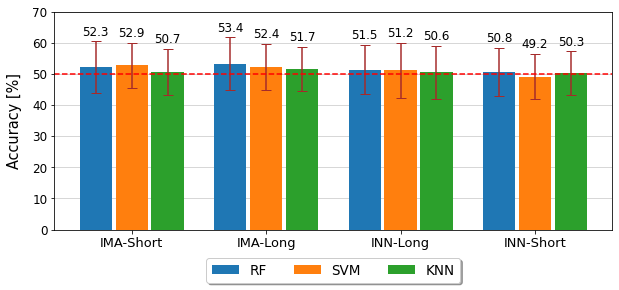

In [27]:
def bar_plot3(ax, data, colors=None, total_width=0.8, single_width=1, legend=True, title = False,\
             title_string = None):
    
    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data['values'])
    # The width of a single bar
    bar_width = total_width / n_bars
    # List containing handles for the drawn bars, used for the legend
    bars = []

    for i, (name, values) in enumerate(data['values'].items()):
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
        for x, y in enumerate(values):
            error = data['stds'][name][x]
            bar = ax.bar(x + x_offset, np.round(y,1), width=bar_width * single_width, \
                         color=colors[i % len(colors)],yerr=error,\
                        align='center', ecolor='brown', capsize=5)
            ax.bar_label(bar, fontsize=12, rotation=0, padding=3)
        bars.append(bar[0])
        
    ax.set_title('{}'.format(title_string),fontsize = 16,pad=15)
    plt.axhline(y=50, color='red', linestyle='dashed', linewidth=1.5,label= 'Chance level')

    box = ax.get_position()
    ax.legend(bars, data['values'].keys(),loc='upper center', \
              bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5, fontsize=13.5)
    
def graph_printer3(title):
    
    data = graph_data4

    fig, ax1 = plt.subplots(figsize=(10,4))


    plt.yticks(list(i for i in range(0,75,10)))

    bar_plot3(ax1, data, total_width=.8, single_width=.9,legend=False, \
             title = True, title_string=title)
    
    ax1.set_ylabel('Accuracy [%]',fontsize = 14.5,labelpad=10)
    ax1.set_axisbelow(True)
    ax1.grid(axis='y',linewidth = 0.5)
    ax1.tick_params(axis = 'y',labelsize=12)
    plt.xticks(range(4),speech_complexities,fontsize=13)
    plt.ylim(0, 70)
    plt.savefig('longshort.png', bbox_inches='tight', dpi=300)

graph_printer3('')

# 4. 4-class classification by word repetition number

### Imagined speech

In [22]:
P1_ima_1to5 = [[25.2,5.3],[24.8,4.8],[24.8,4.5]]
P1_ima_3to7 = [[27.9,5.4],[26.1,5.4],[24.9,4.7]]
P1_ima_6to10 = [[25.5,4.8],[26.7,5.2],[27.1,5.1]]

P2_ima_1to5 = [[26.1,5.3],[28.7,6.9],[27.9,5.7]]
P2_ima_3to7 = [[26.9,5.4],[27.5,4.2],[27.5,4.6]]
P2_ima_6to10 = [[29.5,5.6],[28.5,5.8],[27.2,4.8]]

P6_ima_1to5 = [[24.9,5],[26.9,6.6],[22.9,6.2]]
P6_ima_3to7 = [[26.6,7],[24.6,6.1],[23.1,6.1]]
P6_ima_6to10 = [[30.1,5.9],[29.6,6.4],[27.4,6]]

P7_ima_1to5 = [[24.8,8.6],[26.9,5.8],[25.8,7.4]]
P7_ima_3to7 = [[25.9,6],[29.7,6.1],[25.3,6.6]]
P7_ima_6to10 = [[25.9,6],[27,6],[24.4,5.6]]

P3_inn_1to5 = [[25.3,4.9],[23.9,5.8],[26,4.7]]
P3_inn_3to7 = [[24.6,6.2],[25.8,5.8],[23.4,4.6]]
P3_inn_6to10 = [[25.7,5.4],[22.6,5],[25,4.2]]

P4_inn_1to5 = [[24.3,7.3],[24.6,5.4],[24.9,5.1]]
P4_inn_3to7 = [[25.9,5.3],[23.9,5.4],[24.2,6.4]]
P4_inn_6to10 = [[29.3,6.7],[26.5,5.3],[25.9,4.9]]

P5_inn_1to5 = [[24.2,7.8],[25.7,8.6],[25.4,7.2]]
P5_inn_3to7 = [[25.8,8.9],[21.6,7.6],[22.1,9.2]]
P5_inn_6to10 = [[27.8,7.4],[29.4,7.6],[25.7,9.7]]

P8_inn_1to5 = [[26.8,7.8],[27.7,7.2],[23.9,8]]
P8_inn_3to7 = [[24.7,6.5],[25.4,6],[27.3,9.4]]
P8_inn_6to10 = [[24.4,7.5],[31.5,6.2],[23.4,8.7]]

P9_inn_1to5 = [[26.4,7.6],[29.5,6.3],[26.7,6.6]]
P9_inn_3to7 = [[26.7,6.8],[27.4,6.7],[25.9,5.7]]
P9_inn_6to10 = [[23.8,5.4],[23.3,4.9],[23.9,6.3]]


# Collecting data together
ima_1to5 = np.array([P1_ima_1to5, P2_ima_1to5, P6_ima_1to5, P7_ima_1to5])
ima_3to7 = np.array([P1_ima_3to7, P2_ima_3to7, P6_ima_3to7, P7_ima_3to7])
ima_6to10 = np.array([P1_ima_6to10, P2_ima_6to10, P6_ima_6to10, P7_ima_6to10])

inn_1to5 = np.array([P3_inn_1to5, P4_inn_1to5, P5_inn_1to5, P8_inn_1to5, P9_inn_1to5])
inn_3to7 = np.array([P3_inn_3to7, P4_inn_3to7, P5_inn_3to7, P8_inn_3to7, P9_inn_3to7])
inn_6to10 = np.array([P3_inn_6to10, P4_inn_6to10, P5_inn_6to10, P8_inn_6to10, P9_inn_6to10])

def stder(para_nclass):
    std_para_nclass = [np.sqrt(\
    sum(para_nclass[:,j,1]**2 + ( para_nclass[:,j,0] - np.mean(para_nclass[:,j,0]))**2\
                             )/len(para_nclass)) for j in range(3)]
    return std_para_nclass


# Calculating averages and standard deviations using pooled estimators
mean_ima_1to5 = [np.mean(ima_1to5[:,i,0]) for i in range(3)]
std_ima_1to5 = stder(ima_1to5)

mean_ima_3to7 = [np.mean(ima_3to7[:,i,0]) for i in range(3)]
std_ima_3to7 = stder(ima_3to7)

mean_ima_6to10 = [np.mean(ima_6to10[:,i,0]) for i in range(3)]
std_ima_6to10 = stder(ima_6to10)

mean_inn_1to5 = [np.mean(inn_1to5[:,i,0]) for i in range(3)]
std_inn_1to5 = stder(inn_1to5)

mean_inn_3to7 = [np.mean(inn_3to7[:,i,0]) for i in range(3)]
std_inn_3to7 = stder(inn_3to7)

mean_inn_6to10 = [np.mean(inn_6to10[:,i,0]) for i in range(3)]
std_inn_6to10 = stder(inn_6to10)

graph_data5 = {
    'values':
        {'RF':[mean_ima_1to5[0], mean_ima_3to7[0],mean_ima_6to10[0],\
               mean_inn_1to5[0], mean_inn_3to7[0],mean_inn_6to10[0]],
        'SVM':[mean_ima_1to5[1], mean_ima_3to7[1],mean_ima_6to10[1],\
               mean_inn_1to5[1], mean_inn_3to7[1],mean_inn_6to10[1]],
        'KNN':[mean_ima_1to5[2], mean_ima_3to7[2],mean_ima_6to10[2],\
               mean_inn_1to5[2], mean_inn_3to7[2],mean_inn_6to10[2]]},
    'stds':
        {'RF':[std_ima_1to5[0], std_ima_3to7[0],std_ima_6to10[0],\
               std_inn_1to5[0], std_inn_3to7[0],std_inn_6to10[0]],
        'SVM':[std_ima_1to5[1], std_ima_3to7[1],std_ima_6to10[1],\
               std_inn_1to5[1], std_inn_3to7[1],std_inn_6to10[1]],
        'KNN':[std_ima_1to5[2], std_ima_3to7[2],std_ima_6to10[2],\
               std_inn_1to5[2], std_inn_3to7[2],std_inn_6to10[2]]}
}

rep_numbers = ['IMA 1-5','IMA 3-7','IMA 6-10','INN 1-5','INN 3-7','INN 6-10']

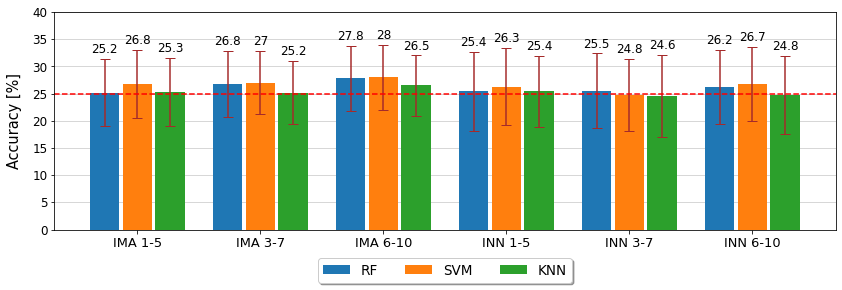

In [23]:
def bar_plot5(ax, data, colors=None, total_width=0.8, single_width=1, legend=True, title = False,\
             title_string = None):
    
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    n_bars = len(data['values'])
    bar_width = total_width / n_bars
    bars = []

    for i, (name, values) in enumerate(data['values'].items()):
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        for x, y in enumerate(values):
            error = data['stds'][name][x]
            bar = ax.bar(x + x_offset, np.round(y,1), width=bar_width * single_width, \
                         color=colors[i % len(colors)],yerr=error,\
                        align='center', ecolor='brown', capsize=5)
            
            ax.bar_label(bar, fontsize=12, rotation=0, padding=3)
        bars.append(bar[0])
        
    ax.set_title('{}'.format(title_string),fontsize = 16,pad=15)
    plt.axhline(y=25, color='red', linestyle='dashed', linewidth=1.5,label= 'Chance level')
    
    box = ax.get_position()
    ax.legend(bars, data['values'].keys(),loc='upper center', \
              bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5, fontsize=13.5)
    
def graph_printer5(title):
    
    data = graph_data5

    fig, ax1 = plt.subplots(figsize=(14,4))

  
    plt.yticks(list(i for i in range(0,75,5)))

    bar_plot5(ax1, data, total_width=.8, single_width=.9,legend=False, \
             title = True, title_string=title)
    
    ax1.set_ylabel('Accuracy [%]',fontsize = 14.5,labelpad=10)
    ax1.set_axisbelow(True)
    ax1.grid(axis='y',linewidth = 0.5)
    ax1.tick_params(axis = 'y',labelsize=12)
    plt.xticks(range(6),rep_numbers,fontsize=13)
    plt.ylim(0, 40)
    plt.savefig('repetition.png', bbox_inches='tight', dpi=300)

graph_printer5('')